<h1><b> Implementing Decision Tree Classification on Breast Cancer Dataset 

<b><h1>DECISION TREE </h1></b>
<ol>
<li> Supervised learning Technique </li>
<li> Used for both Regression and classification </li>
<li> Sensitive to small variation in data </li>
<li> Robust to outliers and missing Values</li>
<li> Feature Scalling is not required </li>
<li> Metric used for spliting : Information Gain , Gain Ratio , Gini Impurity</li>


In [1]:
#importing libraries 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [2]:
#load dataset
X , Y = load_breast_cancer(return_X_y=True,as_frame=True)

## EDA 

In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

INFERENCE : NO MISSING VALUES 

decision trees not affected by outliers 


In [7]:
#spliting data into train and test 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

## Decision Tree ( Classification ) 

In [8]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

[Text(0.6495726495726496, 0.95, 'X[27] <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [165, 290]'),
 Text(0.5042735042735043, 0.85, 'X[23] <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [24, 279]'),
 Text(0.4188034188034188, 0.75, 'X[22] <= 107.75\ngini = 0.073\nsamples = 288\nvalue = [11, 277]'),
 Text(0.3504273504273504, 0.65, 'X[10] <= 1.048\ngini = 0.036\nsamples = 269\nvalue = [5, 264]'),
 Text(0.3162393162393162, 0.55, 'X[13] <= 48.975\ngini = 0.029\nsamples = 268\nvalue = [4, 264]'),
 Text(0.2222222222222222, 0.45, 'X[6] <= 0.139\ngini = 0.022\nsamples = 265\nvalue = [3, 262]'),
 Text(0.13675213675213677, 0.35, 'X[14] <= 0.003\ngini = 0.015\nsamples = 262\nvalue = [2, 260]'),
 Text(0.06837606837606838, 0.25, 'X[20] <= 15.635\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.03418803418803419, 0.15, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.10256410256410256, 0.15, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.20512820512820512, 0.25, 'X[21] <= 32.83\ngini = 

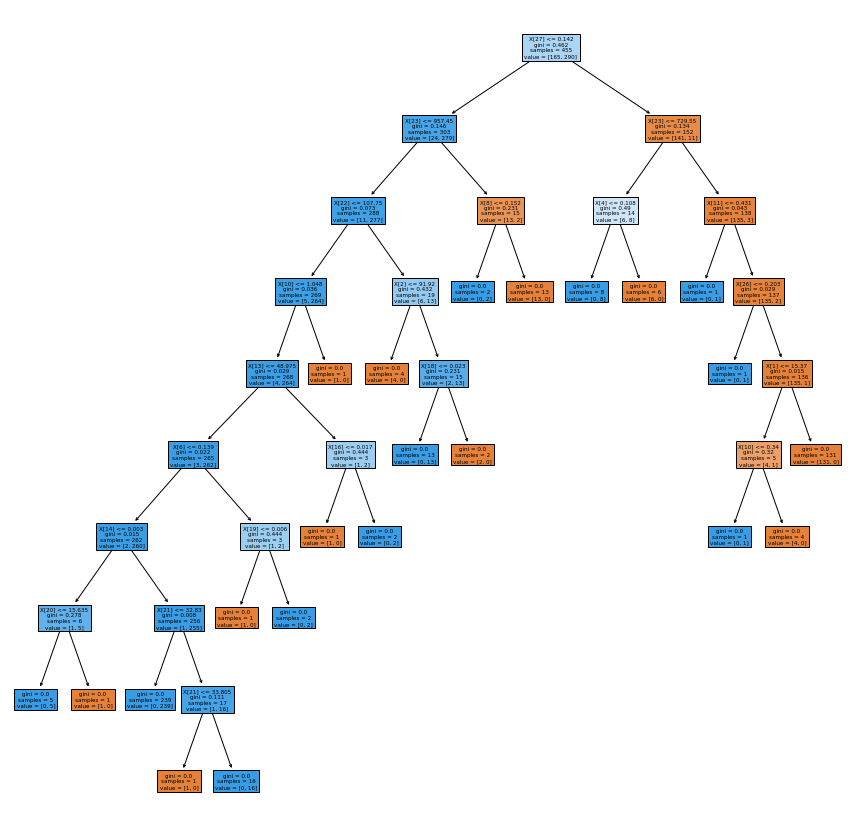

In [9]:
plt.figure(figsize=(15,15))
tree.plot_tree(model,filled=True)

In [10]:
Y_pred = model.predict(X_test)

In [11]:
print('train score ',model.score(X_train,Y_train))

train score  1.0


In [12]:
print('test score ',model.score(X_test,Y_test))

test score  0.9035087719298246


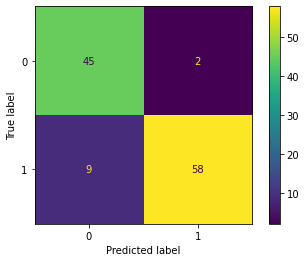

In [13]:
# confusion matrix 
cm = confusion_matrix(Y_test,Y_pred)
fig = ConfusionMatrixDisplay(cm , display_labels=model.classes_ )
fig.plot()

Handling Overfitting in Decision Trees ( Train error = 0 always )
<ul><li>Pre Prunning </li>
<li>Post Prunning ( Cost Complexity Pruning )</li></ul> 

##Pre Prunning 

In [14]:
parameter={
 'criterion':['gini','entropy',],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [15]:
pre_prunning_model=DecisionTreeClassifier()
cv=GridSearchCV(pre_prunning_model,param_grid=parameter,cv=5,scoring='accuracy')
cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [16]:
cv.cv_results_

{'mean_fit_time': array([0.0027173 , 0.00193262, 0.00222211, 0.00203567, 0.0020607 ,
        0.00189376, 0.00275707, 0.00284343, 0.00348897, 0.00199847,
        0.00240879, 0.00196471, 0.00257969, 0.00196462, 0.00246997,
        0.00197415, 0.00243092, 0.00196705, 0.00269451, 0.00204496,
        0.00278406, 0.00197277, 0.00335541, 0.00207896, 0.00291719,
        0.00202465, 0.00277748, 0.00197158, 0.0025713 , 0.00210066,
        0.00222173, 0.001895  , 0.00229664, 0.00197887, 0.00222645,
        0.00204701, 0.00289555, 0.00207047, 0.0026907 , 0.00207615,
        0.00269518, 0.00207653, 0.00289607, 0.00327725, 0.00344081,
        0.00200758, 0.00273857, 0.00195804, 0.00313082, 0.0026957 ,
        0.00336466, 0.00202527, 0.00281053, 0.00185938, 0.00345435,
        0.00199656, 0.00313902, 0.00200686, 0.00301213, 0.00207081]),
 'std_fit_time': array([8.94664610e-04, 4.84608269e-05, 1.32349364e-04, 1.12717930e-04,
        6.18927284e-05, 4.22325387e-05, 6.24345309e-04, 2.78027894e-04,
     

In [17]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [18]:
print('test score ( pre-pruning) :',cv.score(X_test,Y_test))

test score ( pre-pruning) : 0.9473684210526315


In [19]:
y_pred_pre_prun = cv.predict(X_test)

In [20]:
cm = confusion_matrix(Y_test,y_pred_pre_prun)

In [21]:
cm

array([[42,  5],
       [ 1, 66]])

In [22]:
fig = ConfusionMatrixDisplay(cm,display_labels=cv.classes_)

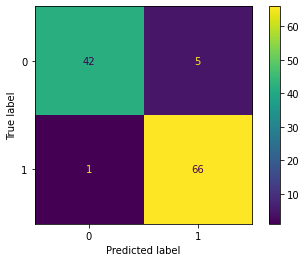

In [23]:
# confusion matrix for pre prunned tree 
fig.plot()

## Post pruning 

In [24]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

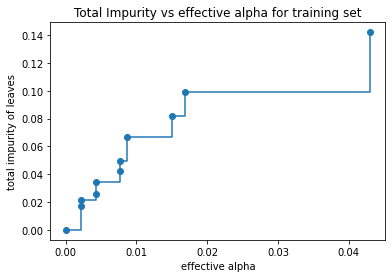

In [25]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [26]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

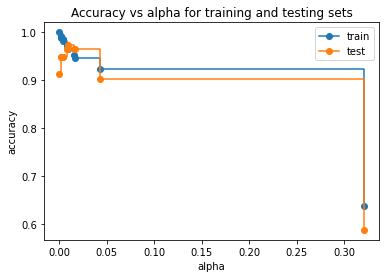

In [28]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

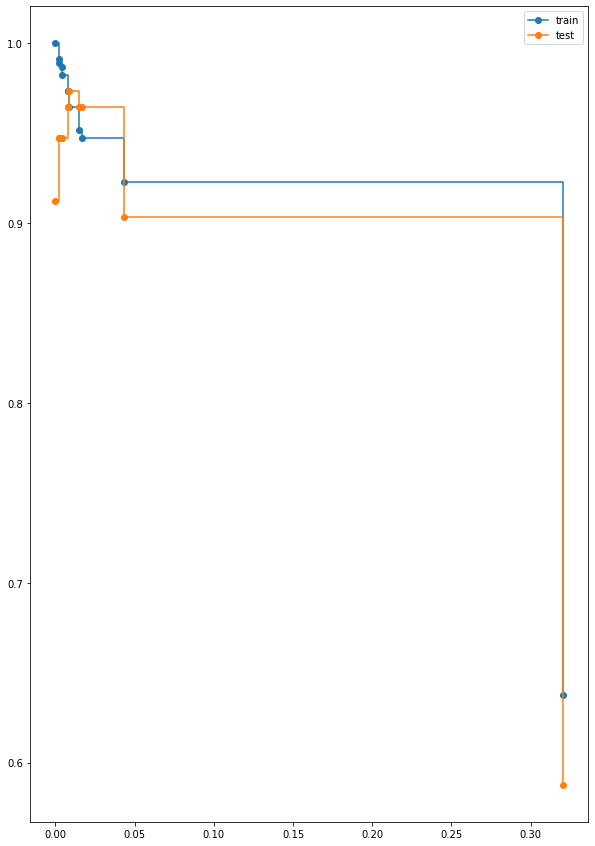

In [33]:
plt.figure(figsize=(10,15))
plt.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

In [38]:
for i in range(len(train_scores)):
  print('ccp_alpha {} train score {} , test score {}'.format(ccp_alphas[i],train_scores[i],test_scores[i]))

ccp_alpha 0.0 train score 1.0 , test score 0.9122807017543859
ccp_alpha 0.002164999179924551 train score 0.9912087912087912 , test score 0.9473684210526315
ccp_alpha 0.0021816418875242375 train score 0.989010989010989 , test score 0.9473684210526315
ccp_alpha 0.004249515118959747 train score 0.9868131868131869 , test score 0.9473684210526315
ccp_alpha 0.004268429779938729 train score 0.9824175824175824 , test score 0.9473684210526315
ccp_alpha 0.00761904761904762 train score 0.9736263736263736 , test score 0.9649122807017544
ccp_alpha 0.00761904761904762 train score 0.9736263736263736 , test score 0.9649122807017544
ccp_alpha 0.008658163913740103 train score 0.9648351648351648 , test score 0.9736842105263158
ccp_alpha 0.015070643642072213 train score 0.9516483516483516 , test score 0.9649122807017544
ccp_alpha 0.016881728928149348 train score 0.9472527472527472 , test score 0.9649122807017544
ccp_alpha 0.04301457343536551 train score 0.9230769230769231 , test score 0.9035087719298246
c

optimal ccp_alpha value : 0.002164999179924551 ( ccp_alpha[1] )

In [40]:
post_prun_model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas[1])
post_prun_model.fit(X_train,Y_train)
y_pred_post_prun = post_prun_model.predict(X_test)


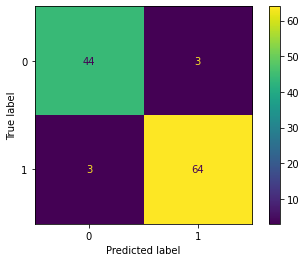

In [42]:
cm = confusion_matrix(Y_test,y_pred_post_prun)
fig = ConfusionMatrixDisplay(cm,display_labels=post_prun_model.classes_)
fig.plot()